In [148]:
from math import sin, cos, pi, isfinite
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [149]:
def nearest_number(target, numbers):
    if not numbers:
        return None

    return min(numbers, key=lambda x: abs(x - target))

x0s = [-1000, -100, -5, 0, 5, 100, 1000]
epsilons =  [-2, -4, -8, -12]
roots = [1.246098386555812, 3.141592653589794, 5.037086920623774]



In [150]:
### f, f'

def f(x):
    return (0.5 * x) + sin(x) - (pi / 2)

def ff(x): # f'
    return 0.5 + cos(x) # 1/2(1+2cos(x))

def fff(x): # f''
    return -sin(x)

def u(x):
    return f(x) / ff(x)

def fi(x):
    return (x - (f(x)) / (ff(x) - fff(x) * u(x)),(f(x)) / (ff(x) - fff(x) * u(x)))


In [151]:
def p(x): 
    return (x+1)*(x-4)*(x-2)

def pp(x): # p'
    return 3*x**2 - 10*x  +2

def ppp(x): # p''
    return 6*x-10

def U(x):
    return p(x) / pp(x)

def P(x):
    return (x - (p(x)) / (pp(x) - ppp(x) * U(x)), (p(x)) / (pp(x) - ppp(x) * U(x)))

In [152]:
def newton(x0, epsilon, f, ff,iter_limit=200000):
    x = x0
    k = 0

    for _ in range(iter_limit):
        if not isfinite(x):
            return k,  float("nan")

        h = -f(x) / ff(x)

        if not isfinite(h):
            return k,  float("nan")

        x += h
        k += 1

        if abs(h) <= epsilon:
            return k, x
        
    return k, float("nan")


def custom(x0, epsilon, fi, iter_limit=200000):
    x = x0
    k = 0
    
    for _ in range(iter_limit):

        if not isfinite(x):
            return k,  float("nan")
        
        x, h = fi(x)
        k += 1

        if not isfinite(h):
            return k,  float("nan")
        
        if abs(h) <= epsilon:
            return k, x
        
    return k, float("nan")

In [ ]:

dict1 = {}
for x in range(-100, 101,):
    arr = []
    for epsilon in epsilons:  
        arr.append(newton(x, epsilon, p, pp))
    dict1[x] = arr

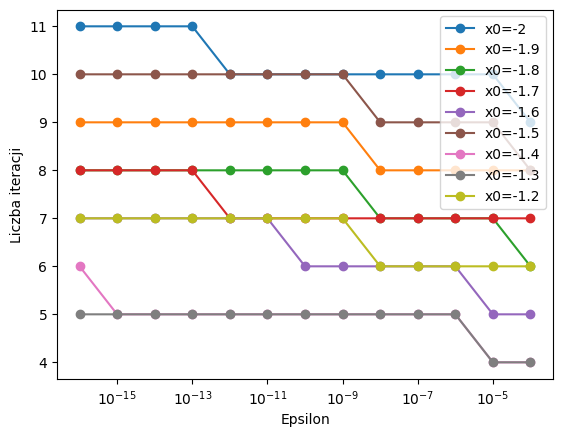

In [ ]:
epsilons = [10**(-i) for i in range(4, 17)]


def frange(start, stop, step):
    while start <= stop:  
        yield round(start, 14)
        start += step

def draw(start, stop, step, exclude, epsilons, f, ff):
    xs = list(frange(start, stop, step))
    for x in xs:
        if x in exclude:
            continue
        ys = []
        for epsilon in epsilons:  
            k, root = newton(x, epsilon, f, ff)
            ys.append(k)
        
        plt.semilogx(epsilons,ys,marker='o',label=f"x0={x}")
    plt.xlabel('Epsilon')
    plt.ylabel('Liczba iteracji')
    plt.legend()
    plt.show()
draw(-2, -1, 0.1, [-1.1], epsilons, f, ff)